
----- Training Models for All Features -----

Stacking Technique Ensemble (All Features) Metrics:
Accuracy: 0.9987650478816508
Precision: 0.9987551502421823
Recall: 0.9987650478816508
F1 Score: 0.9987579023201121


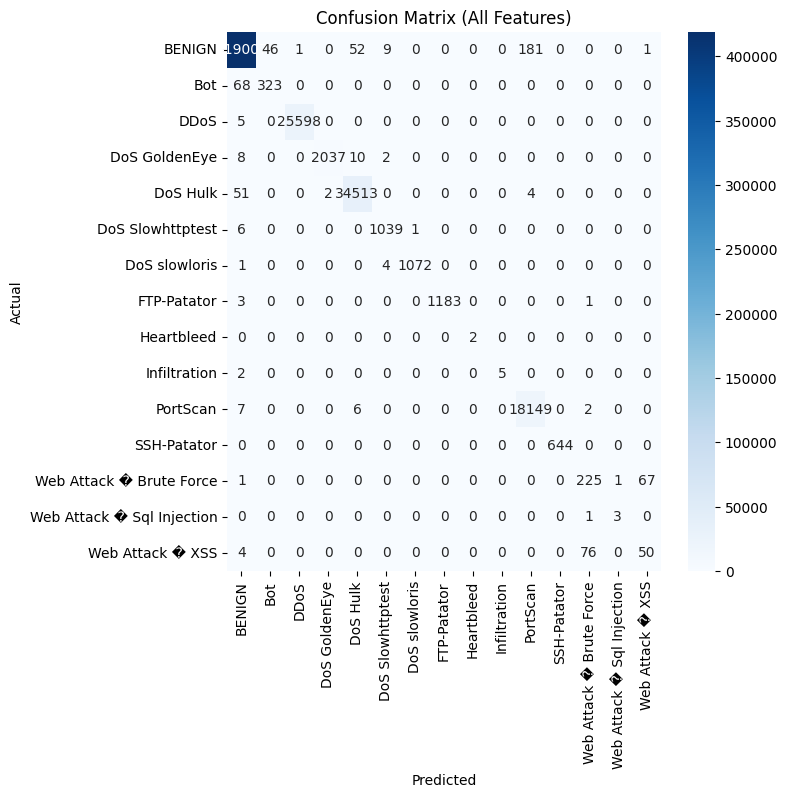


----- Training Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Stacking Technique Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9894701995944283
Precision: 0.9894415508507062
Recall: 0.9894701995944283
F1 Score: 0.988652419907885


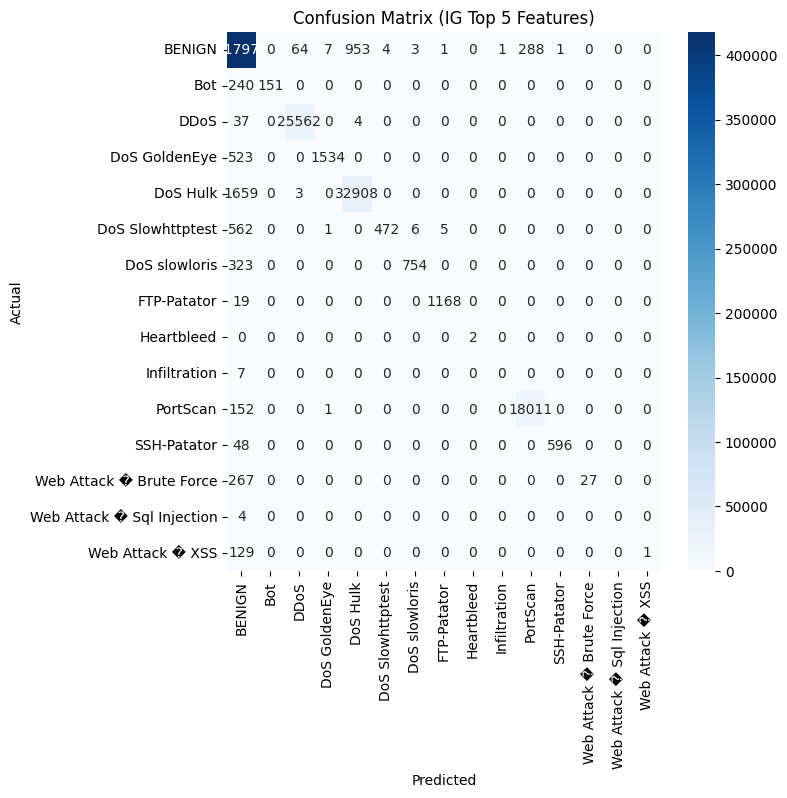


----- Training Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Stacking Technique Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.8870464821705026
Precision: 0.9921048287710962
Recall: 0.8870464821705026
F1 Score: 0.9335649772729671


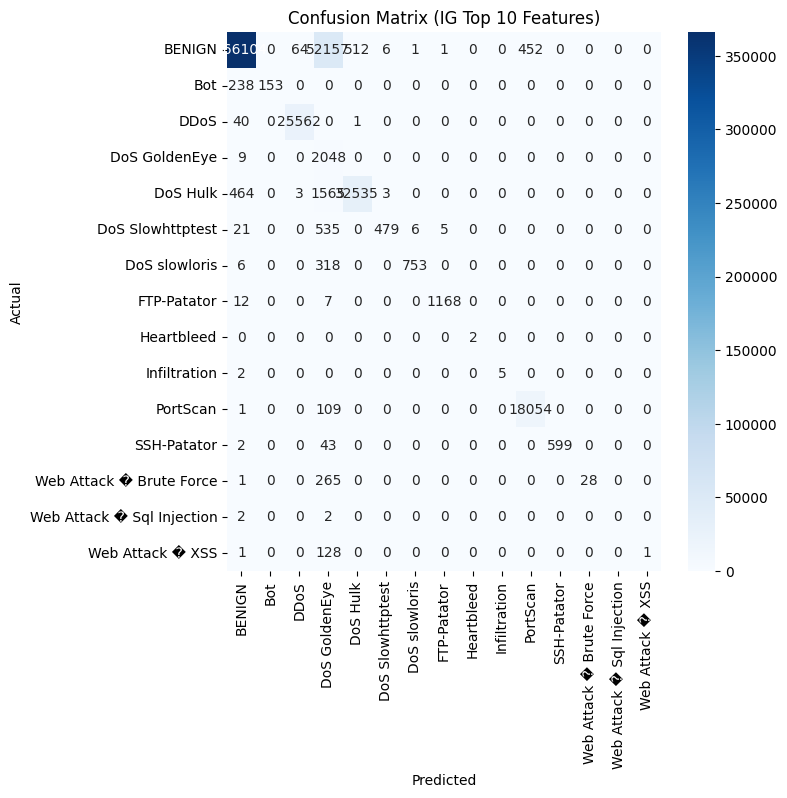


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Stacking Technique Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9566478285260064
Precision: 0.9592687828108973
Recall: 0.9566478285260064
F1 Score: 0.9577075867343439


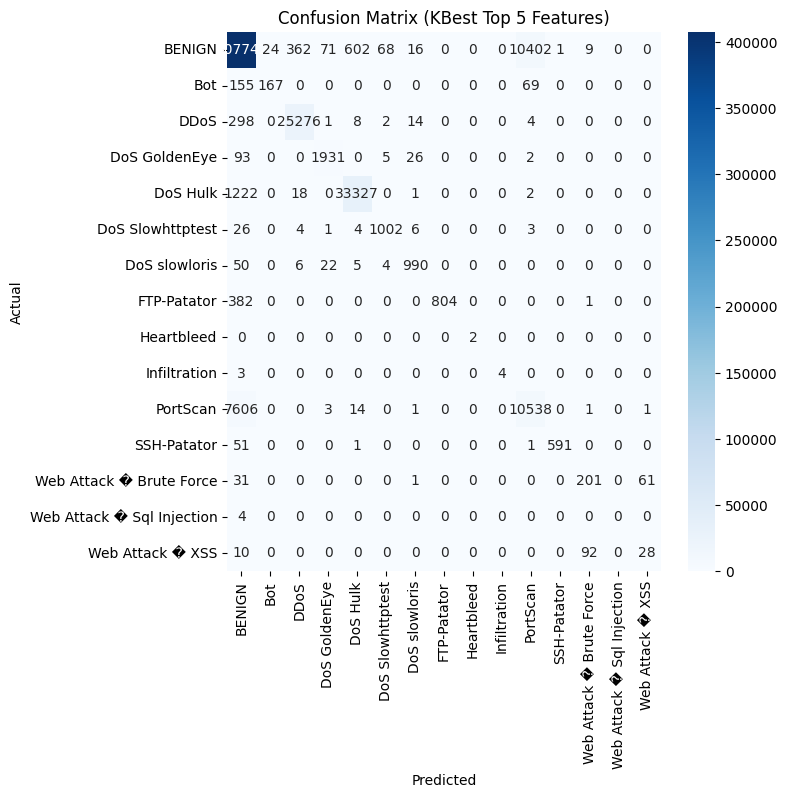


----- Training Models for KBest Top 10 Features -----

Stacking Technique Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9966836679069049
Precision: 0.9965768603465882
Recall: 0.9966836679069049
F1 Score: 0.9965868459569064


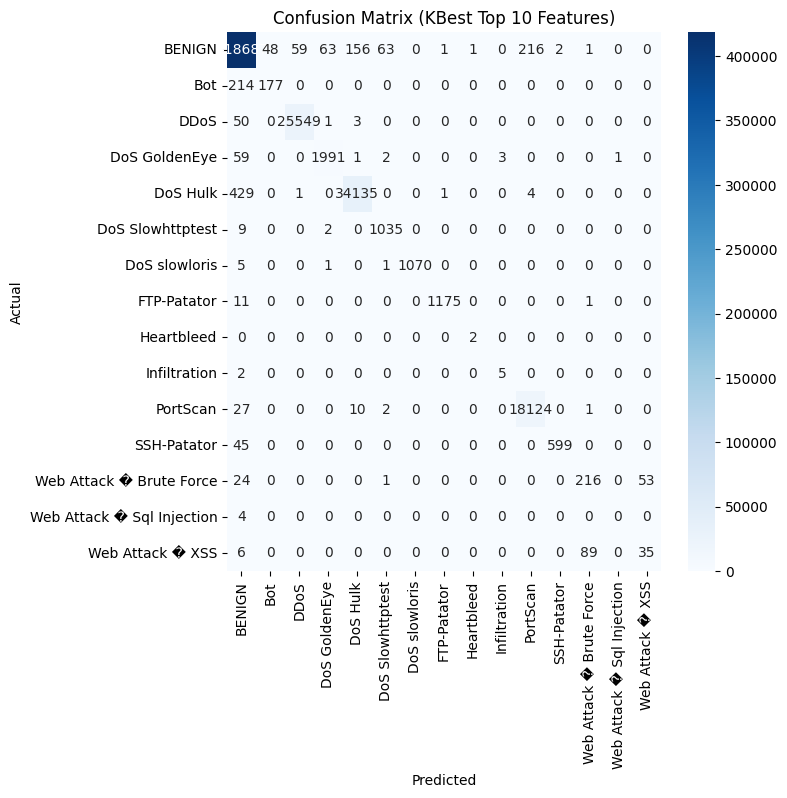

In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import time
from sklearn.ensemble import StackingClassifier
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")
    
    start_time = time.time()

    model1 = DecisionTreeClassifier()
    model2 = KNeighborsClassifier()
    model3 = RandomForestClassifier()

    meta_model = KNeighborsClassifier()

    # Stacking
    stacking_model = StackingClassifier(
        estimators=[('DT', model1), ('KNN', model2), ('RF', model3)],
        final_estimator=meta_model,
        cv=5
    )

    stacking_model.fit(X_tr, y_train)

    train_end_time = time.time()

    final_predictions = stacking_model.predict(X_te)

    pred_end_time = time.time()


    metrics = evaluate_model(y_test, final_predictions, f"Stacking Technique Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_predictions, le.classes_, f"Confusion Matrix ({name})")


In [2]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Stacking_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0         Stacking Technique Ensemble (All Features)  0.998765   0.998755   
1    Stacking Technique Ensemble (IG Top 5 Features)  0.989470   0.989442   
2   Stacking Technique Ensemble (IG Top 10 Features)  0.887046   0.992105   
3  Stacking Technique Ensemble (KBest Top 5 Featu...  0.956648   0.959269   
4  Stacking Technique Ensemble (KBest Top 10 Feat...  0.996684   0.996577   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.998765  0.998758       11133.667694          1170.527933    12304.195626  
1  0.989470  0.988652        3443.692482          1125.445233     4569.137715  
2  0.887046  0.933565        4843.955499          1288.304872     6132.260371  
3  0.956648  0.957708        1694.009367           470.524549     2164.533916  
4  0.996684  0.996587        2714.777861           465.165171     3179.943032  
